<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/EDA_Lab_2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()


In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 74 Jan 13 05:08 kaggle.json


In [ ]:
!pip install -q kaggle

# The kaggle API client expects the file to be in ~/.kaggle, so move it there

!mkdir -p ~/.kaggle #Create the directory
!cp kaggle.json ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

!pwd #Print Working Directory

/content


In [ ]:
!kaggle datasets list

ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                      Netflix Movies and TV Shows                       1MB  2025-01-03 10:33:01           2367         68  1.0              
ankushpanday1/heart-attack-in-youth-vs-adult-in-germany        Heart Attack in Youth Vs Adult in Germany         6MB  2025-01-08 14:33:17           1167         32  1.0              
stealthtechnologies/predict-student-performance-dataset        Predict Student Performance                      12KB  2024-12-26 12:57:04           3419         82  1.0              
yamaerenay/spotify-dataset-1921-2020-160k-tracks               Spotify Dataset 1921-2

In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 40.6MB/s]


In [ ]:
!unzip -q titanic-dataset.zip
print("You can find the unzipped titanic.csv in contents folder")

replace Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
You can find the unzipped titanic.csv in contents folder


In [ ]:
## Step 1: Downloading and Loading the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
url = 'Titanic-Dataset.csv'

In [ ]:
# Read the CSV file
data = pd.read_csv(url)

In [ ]:
## Step 2: Exploring the Dataset

### a. Use pandas functions to explore the data
#Viewing the first few rows helps us quickly understand the dataset's structure,
# identify column names, and preview the type of data present.
# Display first 5 rows
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Display last 5 rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Get an overview of the dataset's structure and types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Summary statistics for numerical features
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Check for missing values
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
## Step 3: Handling Missing Values

### b. Address missing values in relevant features
# Checking for missing values is crucial because it helps identify incomplete data
# that could potentially lead to errors or biases during analysis. Knowing where
# data is missing allows us to decide how to handle these gaps, ensuring a
# cleaner and more reliable dataset for further processing and modeling.
#### Missing values in 'Age':
# Impute missing 'Age' values with the median
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)
# The median is chosen for imputing missing 'Age' values because it is less affected by outliers
# compared to the mean. Using the median ensures that extreme values in the dataset do not skew
# the imputed values, leading to a more accurate representation of the typical age. This approach
# preserves the overall distribution of the 'Age' feature, which is crucial for subsequent analysis
# and modeling.

<ipython-input-38-203914ce325b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(median_age, inplace=True)


In [ ]:
#### Drop rows with missing values in non-critical features:
# Drop rows where 'Embarked' is missing
data.dropna(subset=['Embarked'], inplace=True)

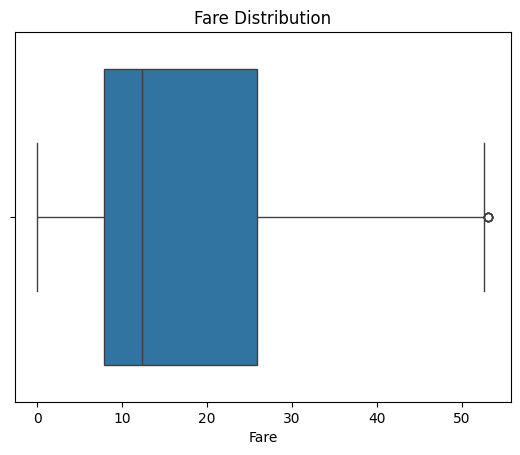

In [ ]:
## Step 4: Analyzing and Handling Outliers

### c. Analyze the distribution of the "Fare" feature


# Visualize the distribution of 'Fare'
sns.boxplot(x=data['Fare'])
plt.title("Fare Distribution")
plt.show()

# A boxplot provides a visual summary of the distribution of the 'Fare' feature, including
# its central tendency and spread. It highlights the presence of outliers as individual
# points outside the whiskers of the plot. These outliers might represent extreme values
# that could skew analysis or models. By examining the boxplot, we can identify these
# anomalies and decide whether to handle them using techniques like the IQR method.

# Handle outliers using IQR method
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Explanation of IQR Method:
# The IQR (Interquartile Range) method is commonly used for detecting outliers because it
# provides a statistical measure of data spread and helps identify values that deviate
# significantly from the majority of the data. The IQR is calculated as the difference
# between the 75th percentile (Q3) and the 25th percentile (Q1). Outliers are defined as
# values lying below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]


In [ ]:
## Step 5: Cleaning the "Cabin" Feature

### d. Extract meaningful information from "Cabin"


# Create a new feature indicating the presence of a cabin
data['Has_Cabin'] = data['Cabin'].notnull().astype(int)

# This new feature, "Has_Cabin," is a binary indicator where 1 represents the presence of
# a cabin and 0 represents its absence. This simplifies the "Cabin" feature, making it
# easier to use in predictive models by capturing the essence of whether a passenger had
# a cabin without dealing with complex cabin codes.

# Drop the original 'Cabin' column if it's no longer needed
data.drop(columns=['Cabin'], inplace=True)

In [ ]:
## Step 6: Creating a New Feature

### e. Categorize passengers into age groups


# Define age groups
data['Age_Group'] = pd.cut(
    data['Age'],
    bins=[0, 12, 18, 35, 60, np.inf],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
)

# The "Age_Group" feature categorizes passengers into distinct age brackets, which can
# reveal insights about the distribution of ages and their relationship with survival rates.
# These specific intervals were chosen to align with common life stages, providing meaningful
# distinctions between different age demographics. For instance, children and seniors might
# have different survival probabilities compared to young adults or teens. This feature is
# useful for predictive modeling, as it helps capture non-linear patterns and age-related
# trends that might not be apparent when using the raw "Age" values alone.

# Verify the new feature
data[['Age', 'Age_Group']].head()

,Age,Age_Group
0,22.0,Young Adult
2,26.0,Young Adult
4,35.0,Young Adult
5,28.0,Young Adult
6,54.0,Adult


In [ ]:
## Step 7: Save the Cleaned Dataset (Optional)


# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_titanic.csv', index=False)
